# Heart Disease Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
health=pd.read_csv("Heart_Disease_UCI.csv")

In [66]:
health.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


## Validate DataTypes

In [67]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


## Null value check  (No Null Values)

In [68]:
health.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

# Summary of Data

In [69]:
health.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [70]:
health.shape

(297, 14)

In [71]:
health.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

# Cleaned Dataset

In [72]:
health

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


## Gender Distribution Analysis

### Count number of males and females

In [73]:
male=health[health["sex"]==1].count()
male_count=male["age"]
print("male count: ",male["age"])
female=health[health["sex"]==0].count()
female_count=female["age"]
print("female count: ",female["age"])

male count:  201
female count:  96


### Calculate percentage distribution using NumPy

In [74]:
total=health["age"].count()
male_percent=male_count/total*100
female_percent=female_count/total*100
print("Male Distribution: ",male_percent.round(2))
print("Female Distribution: ",female_percent.round(2))

Male Distribution:  67.68
Female Distribution:  32.32


### Plot a bar chart using Matplotlib

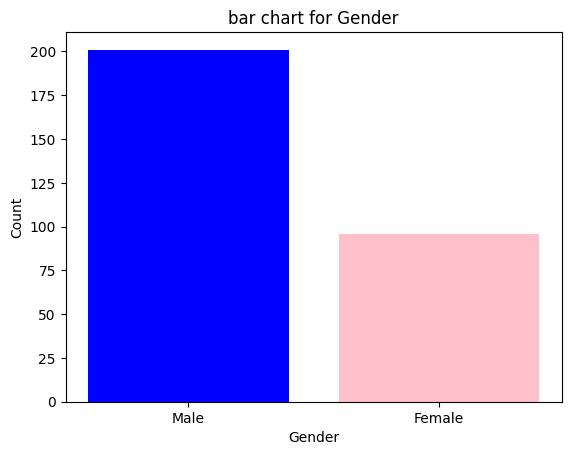

In [75]:
x=["Male","Female"]
y=[male["age"],female["age"]]
plt.bar(x,y,color=["blue","pink"],width=0.8)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("bar chart for Gender")
plt.show()

### Minimum age Maximum age Mean age Median age


In [76]:
print("Minimum age: ",health["age"].min())
print("Maximum age: ",health["age"].max())
print("Mean age: ",health["age"].mean())
print("Median age: ",health["age"].median())

Minimum age:  29
Maximum age:  77
Mean age:  54.54208754208754
Median age:  56.0


### Plot histogram of age distribution

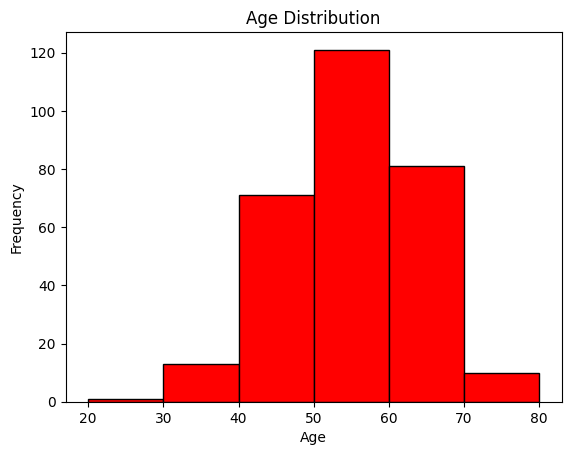

In [5]:
bins=[20,30,40,50,60,70,80]
plt.hist(health["age"],bins=bins,color="red",edgecolor="black")
plt.title("Age Distribution") 
plt.xlabel("Age") 
plt.ylabel("Frequency") 
plt.xticks(bins)
plt.show()

# Target Variable Analysis

## Count number of patients with and without heart disease

In [78]:
disease=health.groupby("condition")["age"].count()
disease

condition
0    160
1    137
Name: age, dtype: int64

In [79]:
print("Patient Without Disease: ",disease.values[0])

Patient Without Disease:  160


In [80]:
print("Patient With Disease: ",disease.values[1])

Patient With Disease:  137


## Plot pie chart

([<matplotlib.patches.Wedge at 0x28b39681640>,
 [Text(-0.13347885143430296, 1.0918715108563732, 'Without Disease'),
  Text(0.13347885143430332, -1.0918715108563732, 'With Disease')])

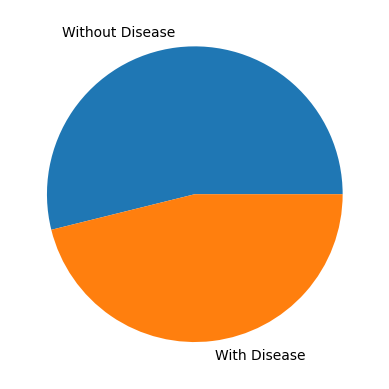

In [81]:
plt.pie([disease.values[0],disease.values[1]],labels=["Without Disease","With Disease"])

## Calculate disease percentage

In [82]:
dis_per=disease.values[1]/health["condition"].count()*100
print("Disease Percentage :",dis_per.round(2))

Disease Percentage : 46.13


# Correlation Between Age and Cholesterol

In [83]:
health.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


## Plot scatter plot (Age vs Cholesterol)

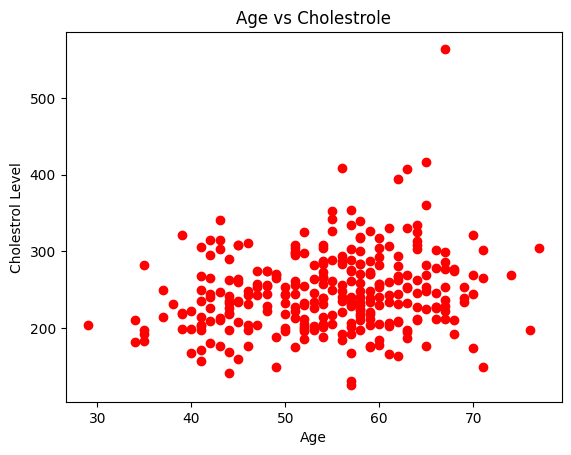

In [84]:
plt.scatter(health["age"],health["chol"],marker="o",color="red")
plt.xlabel("Age")
plt.ylabel("Cholestrol Level")
plt.title("Age vs Cholestrole")
plt.show()

## Interpret relationship

### ans)cholesterol tends to rise slightly with age. so there is positive relation of age and cholestrole

# Chest Pain Type vs Disease

## Group by cp and calculate disease rate

In [85]:
chest=health.groupby("cp")["condition"].mean()*100

In [86]:
chest_pain=pd.DataFrame(chest)
chest_pain

,condition
cp,
0,30.434783
1,18.367347
2,21.686747
3,72.535211


## Plot grouped bar chart

Index([0, 1, 2, 3], dtype='int64', name='cp')
[30.43478261 18.36734694 21.68674699 72.53521127]


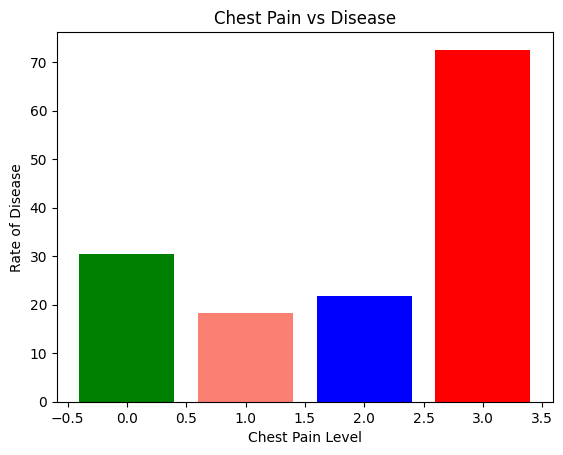

In [87]:
x=chest.index
y=chest.values
print(x)
print(y)
plt.bar(x,y,color=["green","salmon","blue","red"],width=0.8)
plt.xlabel("Chest Pain Level")
plt.ylabel("Rate of Disease")
plt.title("Chest Pain vs Disease")
plt.show()

## Identify which chest pain type is most risky

a) Level 3 Chest Pain cause more risky

## Average Cholesterol by Gender

### Group by sex

In [88]:
grp_sex=health.groupby("sex")
grp_sex

### Calculate mean cholesterol

In [89]:
mean_chol=grp_sex["chol"].mean()
mean_chol

sex
0    262.229167
1    240.243781
Name: chol, dtype: float64

### Visualize using bar plot 

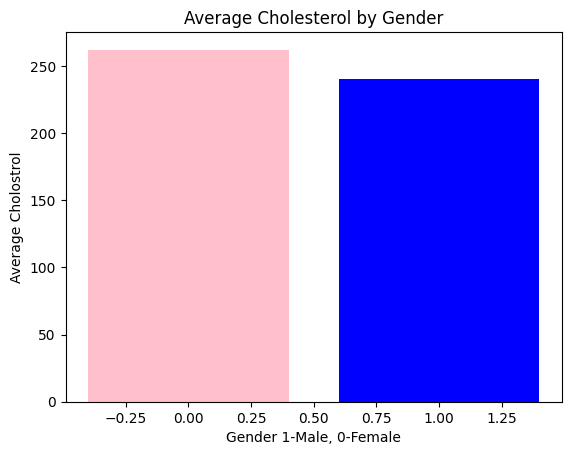

In [90]:
plt.bar(mean_chol.index,mean_chol.values,color=["pink","blue"],width=0.8)
plt.xlabel("Gender 1-Male, 0-Female")
plt.ylabel("Average Cholostrol")
plt.title("Average Cholesterol by Gender")
plt.show()

# Resting Blood Pressure Analysis

## Average BP , Patients with BP > 140


In [91]:
print("Average Blood Pressure: ",health["trestbps"].mean().round(2))

Average Blood Pressure:  131.69


In [93]:
high_bp = health[health["trestbps"] > 140]
high_bp

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,50,1,3,150,243,0,2,128,0,2.6,1,0,2,1
264,50,1,3,144,200,0,2,126,1,0.9,1,0,2,1
277,45,1,3,142,309,0,2,147,1,0.0,1,3,2,1
285,43,1,3,150,247,0,0,171,0,1.5,0,0,0,0


In [97]:
normal_bp = health[health["trestbps"] <= 140]
normal_bp

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
12,59,1,0,134,204,0,0,162,0,0.8,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,40,1,3,110,167,0,2,114,1,2.0,1,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [100]:
high_bp_rate = high_bp["condition"].mean() * 100 
normal_bp_rate = normal_bp["condition"].mean() * 100 
print("Disease rate in High BP group (>140):", high_bp_rate.round(2)) 
print("Disease rate in Normal BP group (<=140):", normal_bp_rate.round(2))

Disease rate in High BP group (>140): 59.09
Disease rate in Normal BP group (<=140): 42.42


## Maximum Heart Rate vs Disease

In [102]:
avg_thalach_disease = health[health["condition"] == 1]["thalach"].mean()
avg_thalach_no_disease = health[health["condition"] == 0]["thalach"].mean()
print("Average thalach (Disease):", avg_thalach_disease)
print("Average thalach (No Disease):", avg_thalach_no_disease)

Average thalach (Disease): 139.1094890510949
Average thalach (No Disease): 158.58125


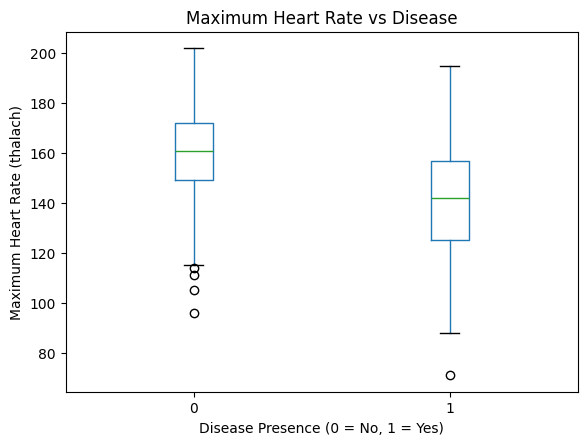

In [104]:
health.boxplot(column="thalach", by="condition", grid=False)
plt.title("Maximum Heart Rate vs Disease")
plt.suptitle("")
plt.xlabel("Disease Presence (0 = No, 1 = Yes)")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.show()

#  Exercise Induced Angina Impact

### Calculate disease percentage in: exang = 1 exang = 0


In [108]:
exang_disease_rate = health.groupby("exang")["condition"].mean() * 100 
print(exang_disease_rate) 


exang
0    31.50000
1    76.28866
Name: condition, dtype: float64


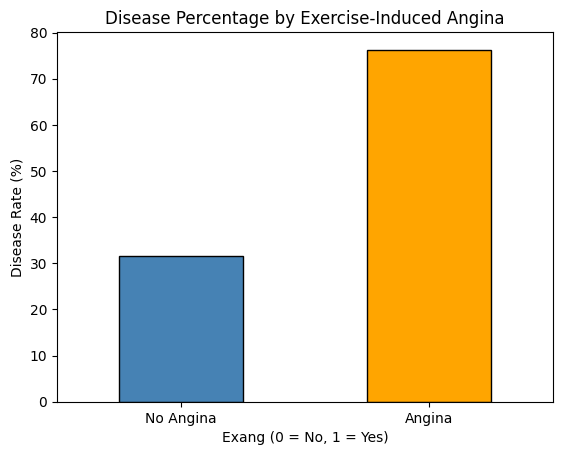

In [107]:
exang_disease_rate.plot(kind="bar", color=["steelblue", "orange"], edgecolor="black") 
plt.title("Disease Percentage by Exercise-Induced Angina") 
plt.xlabel("Exang (0 = No, 1 = Yes)") 
plt.ylabel("Disease Rate (%)") 
plt.xticks([0, 1], ["No Angina", "Angina"], rotation=0) 
plt.show()

# ST Depression (oldpeak) Analysis


##  Calculate mean oldpeak by target

In [110]:
mean_oldpeak = health.groupby("condition")["oldpeak"].mean()
print(mean_oldpeak)


condition
0    0.598750
1    1.589051
Name: oldpeak, dtype: float64


## Plot histogram for both classes

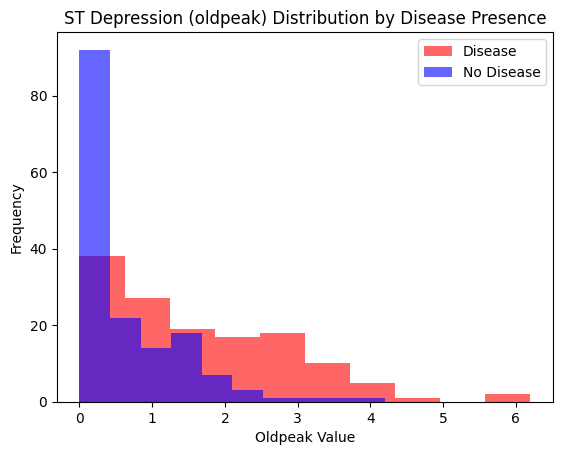

In [113]:
plt.hist(health[health["condition"] == 1]["oldpeak"], bins=10, alpha=0.6, label="Disease", color="red") 
plt.hist(health[health["condition"] == 0]["oldpeak"], bins=10, alpha=0.6, label="No Disease", color="blue") 
plt.title("ST Depression (oldpeak) Distribution by Disease Presence") 
plt.xlabel("Oldpeak Value")
plt.ylabel("Frequency") 
plt.legend() 
plt.show()

## identify trend

### ans) Patients without disease (condition=0) tend to have higher mean oldpeak values, showing more ST depression during exercise.

### Patients with disease (condition=1) generally show lower oldpeak values, meaning less ST depression.

# Number of Major Vessels (ca) Impact
## Group by ca
## Calculate disease probability
## Plot line chart


In [118]:
ca_disease = health.groupby("ca")["condition"].mean() * 100 
print(ca_disease)

ca
0    25.862069
1    67.692308
2    81.578947
3    85.000000
Name: condition, dtype: float64


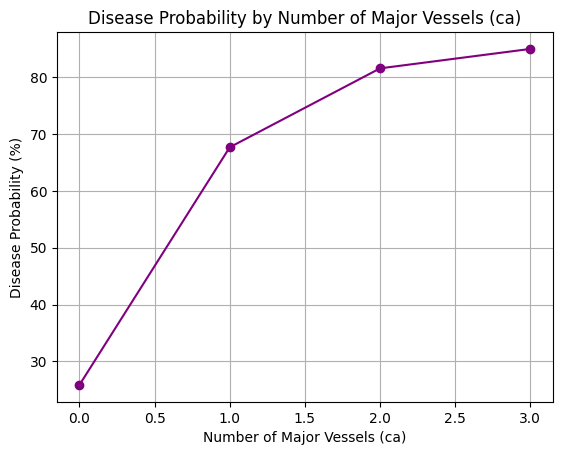

In [119]:
ca_disease.plot(kind="line", marker="o", color="purple") 
plt.title("Disease Probability by Number of Major Vessels (ca)") 
plt.xlabel("Number of Major Vessels (ca)") 
plt.ylabel("Disease Probability (%)") 
plt.grid(True) 
plt.show()

# Thalassemia vs Disease
## Cross-tabulate thal and target
## Convert to percentage
## Plot stacked bar chart


In [121]:
thal_target = pd.crosstab(health["thal"], health["condition"]) 
print(thal_target)

condition    0   1
thal              
0          127  37
1            6  12
2           27  88


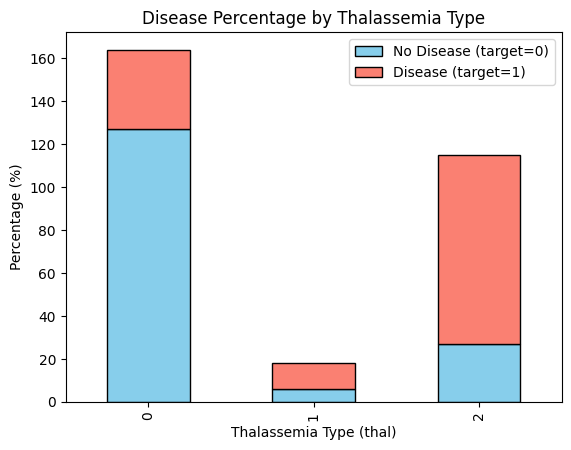

In [122]:
thal_target.plot( kind="bar", stacked=True, color=["skyblue", "salmon"], edgecolor="black" ) 
plt.title("Disease Percentage by Thalassemia Type") 
plt.xlabel("Thalassemia Type (thal)")
plt.ylabel("Percentage (%)") 
plt.legend(["No Disease (target=0)", "Disease (target=1)"]) 
plt.show()

# Multi-Factor Risk Analysis

## Find patients with:
 ### Age > 50
 ### Cholesterol > 240
 ### BP > 140
## Calculate percentage having disease
## Use NumPy filtering


In [127]:
filter_health=health[(health["trestbps"] > 140) & (health["chol"] >240) & (health["age"] >50) ]
filter_health

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0
10,59,1,0,170,288,0,2,159,0,0.2,1,0,2,1
11,59,1,0,160,273,0,2,125,0,0.0,0,0,0,1
13,58,0,0,150,283,1,2,162,0,1.0,0,0,0,0
16,52,1,0,152,298,1,0,178,0,1.2,1,0,2,0
24,71,0,1,160,302,0,0,162,0,0.4,0,2,0,0
25,70,1,1,156,245,0,2,143,0,0.0,0,0,0,0
26,66,1,1,160,246,0,0,120,1,0.0,1,3,1,1
45,54,1,1,192,283,0,2,195,0,0.0,0,1,2,1
74,70,1,2,160,269,0,0,112,1,2.9,1,1,2,1


In [128]:
target_filtered = filter_health["condition"].values

In [129]:
total_patients = target_filtered.shape[0]
diseased_patients = np.sum(target_filtered == 1)
disease_percentage = (diseased_patients / total_patients) * 100

print("Total patients:", total_patients)
print("Diseased patients:", diseased_patients)
print("Disease percentage:", disease_percentage)


Total patients: 33
Diseased patients: 22
Disease percentage: 66.66666666666666


# 15. Create Risk Score (Custom Analysis)
## Create new column:
### risk_score = (chol/200) + (trestbps/120) + (oldpeak)


## Classify patients as:
### Low Risk
### Medium Risk
### High Risk
### Visualize distribution


In [130]:
health["risk_score"] = (health["chol"] / 200) + (health["trestbps"] / 120) + health["oldpeak"]


In [133]:
bins = [0, 3, 5, health["risk_score"].max()]
labels = ["Low Risk", "Medium Risk", "High Risk"]

health["risk_category"] = pd.cut(health["risk_score"], bins=bins, labels=labels, right=False)
health.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,risk_score,risk_category
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0,2.603333,Low Risk
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0,4.161667,Medium Risk
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0,4.980000,Medium Risk
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1,3.960000,Medium Risk
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0,3.771667,Medium Risk


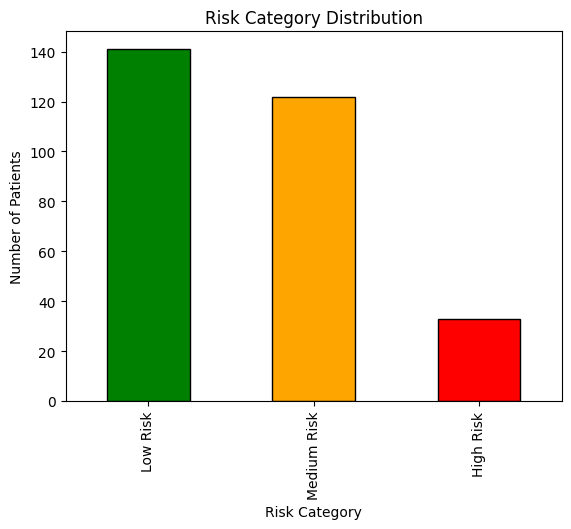

In [132]:
health["risk_category"].value_counts().plot(kind="bar", color=["green", "orange", "red"], edgecolor="black")
plt.title("Risk Category Distribution")
plt.xlabel("Risk Category")
plt.ylabel("Number of Patients")
plt.show()
